In [10]:
import os
import helper as hlp
from keras import layers
from keras import models

models_list = os.listdir('models')
model_h = hlp.load('models/'+models_list[4])


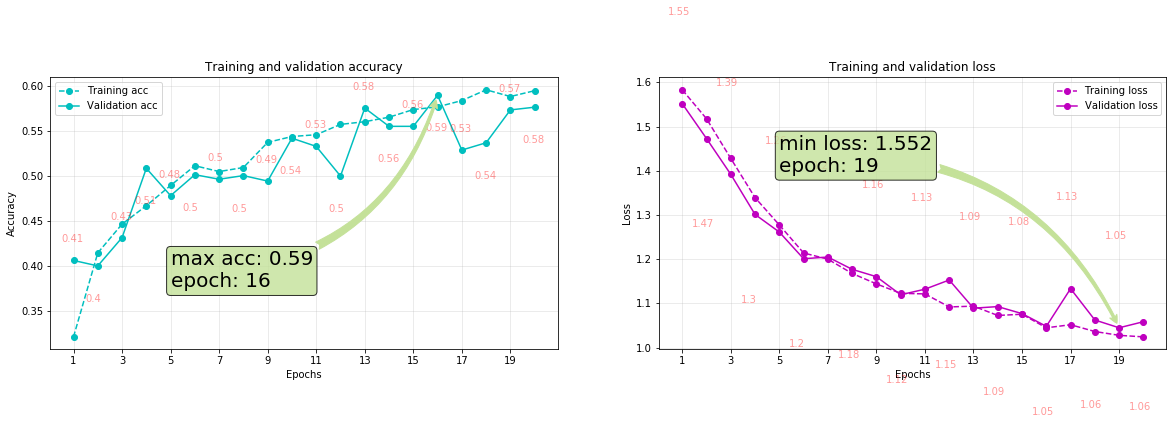

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from keras.models import load_model

history = model_h['history']
h_params = model_h['hyper_parameters']

green_color = '#c4e199'

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20, 5)

#---------------------------------
xa1 = plt.subplot(121)
plt.plot(epochs, acc, 'co--', label='Training acc')
plt.plot(epochs, val_acc, 'co-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1,h_params['epochs']+1, 2))
plt.grid(alpha=.3)
plt.legend()

acc_max_offset = (-4, .12, -.05)
loss_min_offset = (-4, .5, -.2)

for i, v in enumerate(val_acc):
    rvalue = round(v, 2)
    
    if i%2==0: pad = .02
    else: pad = -.04    

    plt.text(i+.5, v + pad, str(rvalue), color='red', alpha=.4, fontweight='normal')
#plt.text(np.argmax(val_acc)+acc_max_offset[0],
#         np.max(val_acc)+acc_max_offset[1],
#         'max acc: ' + str(round(np.max(val_acc), 3)),
#         color='green',
#         alpha=1,
#         fontweight='bold',
#         fontsize=15)
#plt.text(np.argmax(val_acc)+acc_max_offset[0],
#         np.max(val_acc)+acc_max_offset[1]+acc_max_offset[2],
#         'epoch: ' + str(np.argmax(val_acc)),
#         color='green',
#         alpha=1,
#         fontweight='bold',
#         fontsize=15)
el = mpatches.Ellipse((epochs, val_acc), 0.3, 0.4, angle=30, alpha=0.2)
ymax = np.max(val_acc)
xmax = np.argmax(val_acc)+1
xa1.annotate('max acc: ' + str(round(np.max(val_acc), 3)) + '\n' + 'epoch: ' + str(np.argmax(val_acc)+1),
             xy=(xmax, ymax),
             xytext=(len(acc)/4, min(acc)+(max(acc)-min(acc))/5),
             bbox=dict(boxstyle='round,pad=0.2',
                       fc=green_color,
                       alpha=0.8),
             arrowprops=dict(arrowstyle='fancy',
                            color=green_color,
                            patchB=el,
                            shrinkB=5,
                            connectionstyle='arc3,rad=0.3',
                            ),
             fontsize=20,
            ) 
    
#---------------------------------
xa2 = plt.subplot(122)    
plt.plot(epochs, loss, 'mo--', label='Training loss')
plt.plot(epochs, val_loss, 'mo-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1,h_params['epochs']+1, 2))
plt.grid(alpha=.3)
plt.legend()

for i, v in enumerate(val_loss):
    rvalue = round(v, 2)

    if i%2==0: pad = .2
    else: pad = -.2

    plt.text(i+.4, v + pad, str(rvalue), color='red', alpha=.4, fontweight='normal')
    
#plt.text(np.argmin(val_loss)+loss_min_offset[0],
#         np.min(val_loss)+loss_min_offset[1],
#         'min loss: ' + str(round(np.min(val_loss), 3)),
#         color='green',
#         alpha=1,
#         fontweight='bold',
#         fontsize=15)
#plt.text(np.argmin(val_loss)+loss_min_offset[0],
#         np.min(val_loss)+loss_min_offset[1]+loss_min_offset[2],
#         'epoch: ' + str(np.argmin(val_loss)),
#         color='green',
#         alpha=1,
#         fontweight='bold',
#         fontsize=15)

el = mpatches.Ellipse((epochs, val_acc), 0.3, 0.4, angle=30, alpha=0.2)
ymin = np.min(val_loss)
xmin = np.argmin(val_loss)+1
xa2.annotate('min loss: ' + str(round(np.max(val_loss), 3)) + '\n' + 'epoch: ' + str(np.argmin(val_loss)+1), 
             xy=(xmin, ymin),
             xytext=(len(loss)/4, min(loss)+(max(loss)-min(loss))/1.5),
             bbox=dict(boxstyle='round,pad=0.2',
                       fc=green_color,
                       alpha=0.8),
             arrowprops=dict(arrowstyle='fancy',
                            color=green_color,
                            patchB=el,
                            shrinkB=5,
                            connectionstyle='arc3,rad=-0.3',
                            ),
             fontsize=20,
            )

plt.show()